## Interpretable AI: Why Logistic Regression Still Matters in the Era of Deep Learning

## NEURAL NETWORK (DEEP LEARNING) MODEL

In [4]:
# !pip install ucimlrepo *
# !pip install pyspark pandas scikit-learn tensorflow ucimlrepo

apt install python3-ucimlrepo


SyntaxError: invalid syntax (587351426.py, line 4)

In [3]:
# =========================================
# IMPORTS
# =========================================
import pandas as pd
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X_pd = breast_cancer_wisconsin_diagnostic.data.features
y_pd = breast_cancer_wisconsin_diagnostic.data.targets

df_pd = pd.concat([X_pd, y_pd], axis=1)

print(df_pd.info())

ModuleNotFoundError: No module named 'ucimlrepo'

In [3]:
df_pd

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [4]:
df_pd["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:
# =========================================
# LOAD DATA FROM UCI
# =========================================
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark = SparkSession.builder.appName("BreastCancerDL").getOrCreate()

spark_df = spark.createDataFrame(df_pd)
spark_df.show(5)

indexer = StringIndexer(inputCol="diagnosis", outputCol="label")
spark_df = indexer.fit(spark_df).transform(spark_df)
spark_df.show(5)


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/24 17:29:16 WARN Utils: Your hostname, aimsit, resolves to a loopback address: 127.0.1.1; using 10.6.246.20 instead (on interface wlp0s20f3)
25/11/24 17:29:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/24 17:29:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/24 17:29:19 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------+----------+------+-----------+------------+----------+---------------+---------+------------------+-------+--------+----------+-----+-----------+------------+----------+---------------+---------+------------------+-------+--------+----------+------+-----------+------------+----------+---------------+---------+------------------+---------+
|radius1|texture1|perimeter1| area1|smoothness1|compactness1|concavity1|concave_points1|symmetry1|fractal_dimension1|radius2|texture2|perimeter2|area2|smoothness2|compactness2|concavity2|concave_points2|symmetry2|fractal_dimension2|radius3|texture3|perimeter3| area3|smoothness3|compactness3|concavity3|concave_points3|symmetry3|fractal_dimension3|Diagnosis|
+-------+--------+----------+------+-----------+------------+----------+---------------+---------+------------------+-------+--------+----------+-----+-----------+------------+----------+---------------+---------+------------------+-------+--------+----------+------+-----------+---

In [5]:
# =========================================
# DISTRIBUTION OF TARGET VARIABLE (LABEL)
# =========================================
import matplotlib.pyplot as plt

label_pd = spark_df.select("label").toPandas()

plt.figure(figsize=(6,4))
label_pd['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Target Variable (0 = Benign, 1 = Malignant)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Print class counts
print("Class distribution:")
print(label_pd['label'].value_counts())


NameError: name 'spark_df' is not defined

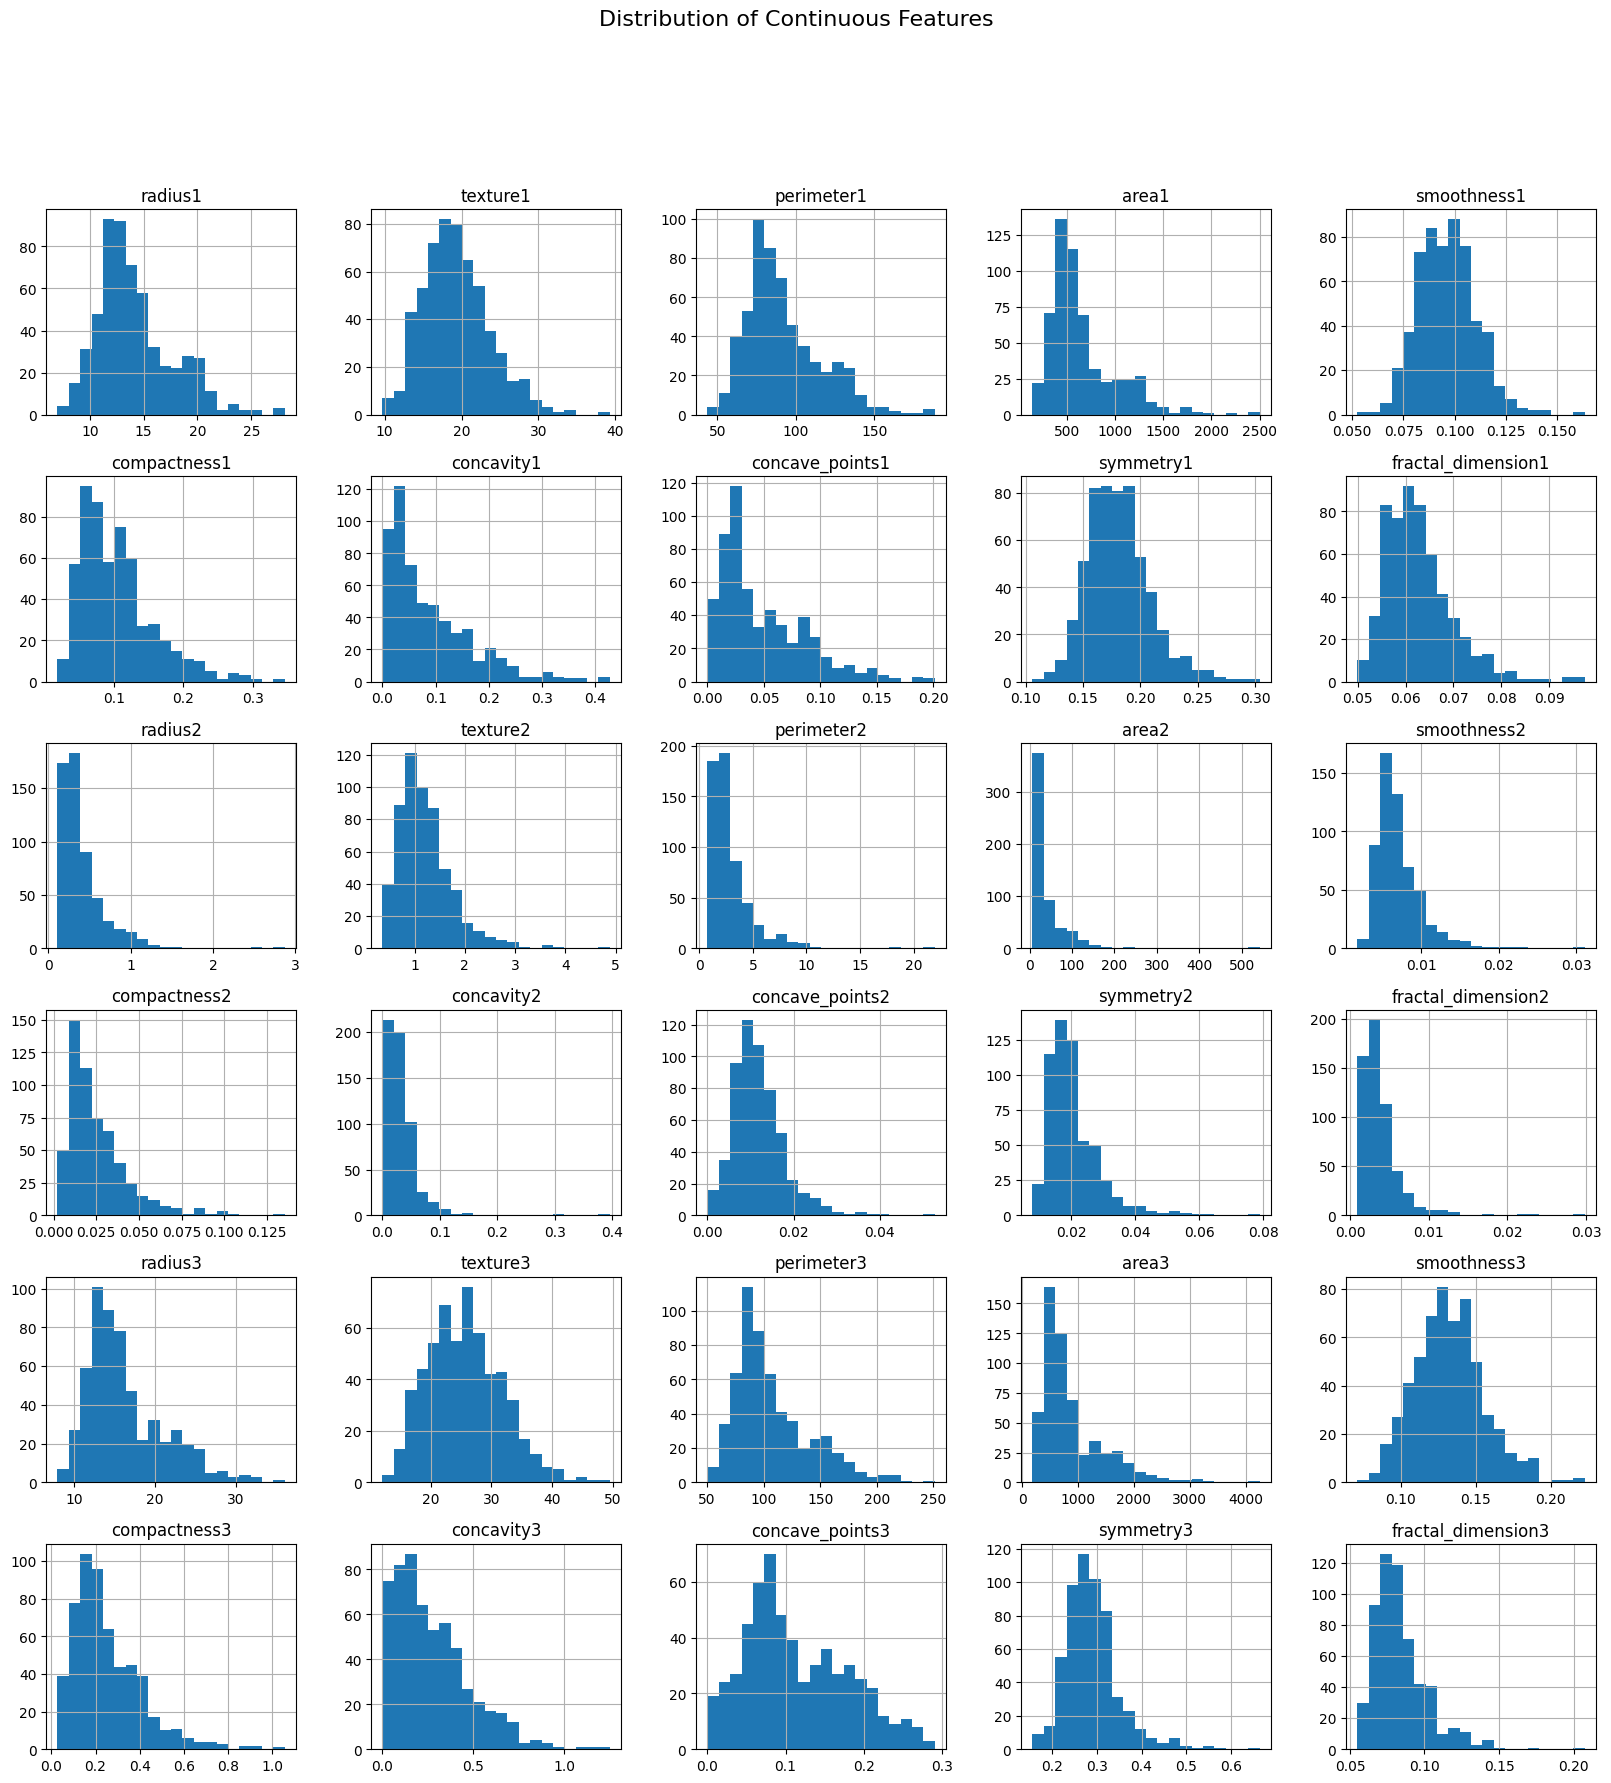

In [7]:
# =====================================================
# HISTOGRAMS FOR ALL CONTINUOUS FEATURES (30 features)
# =====================================================

df_num = df_pd[X_pd.columns]    # Only numeric features

df_num.hist(figsize=(20, 20), bins=20)
plt.suptitle("Distribution of Continuous Features", fontsize=16)
plt.show()


In [8]:

# =========================================
# FEATURE ASSEMBLY + SCALING
# =========================================
feature_cols = X_pd.columns.tolist()

assembler = VectorAssembler(inputCols=feature_cols, outputCol="raw_features")
assembled_df = assembler.transform(spark_df)

scaler = StandardScaler(inputCol="raw_features", outputCol="features",
                        withStd=True, withMean=False)
scaler_model = scaler.fit(assembled_df)
final_df = scaler_model.transform(assembled_df)

final_df.select("features", "label").show(5, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                                                                                                                                                                                                                                                                                                                                                           

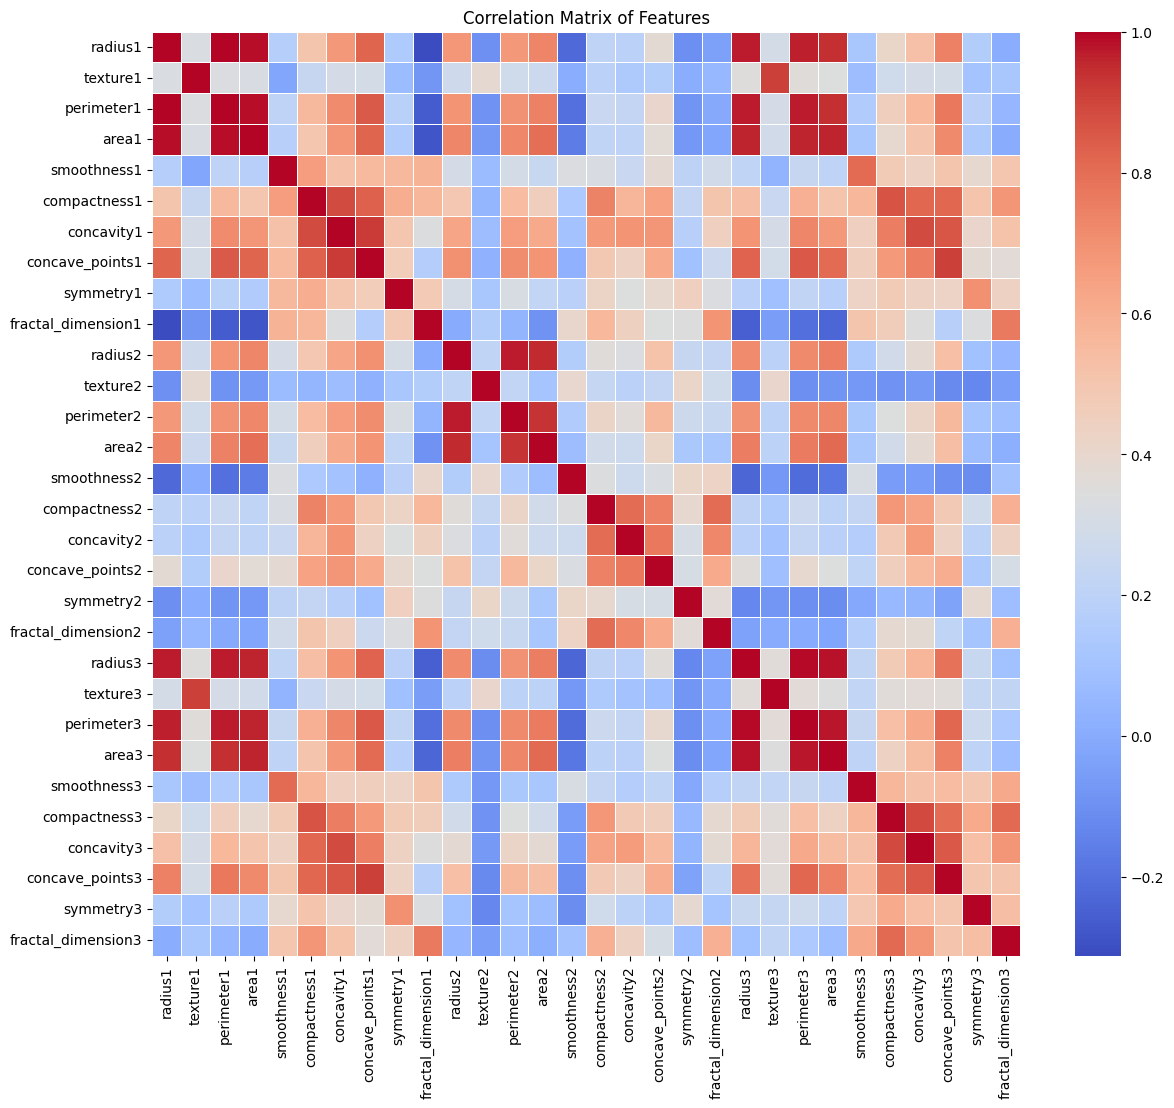

In [9]:
# =========================================
# CORRELATION MATRIX (CONTINUOUS FEATURES)
# =========================================
import seaborn as sns

corr = df_num.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [10]:
feature_count = len(feature_cols)
print(feature_count)

30


In [11]:
# =========================================
# NEED FOR RESAMPLING?
# =========================================

benign = label_pd[label_pd['label'] == 0].shape[0]
malignant = label_pd[label_pd['label'] == 1].shape[0]

print(f"Benign: {benign}, Malignant: {malignant}")

if benign > malignant * 1.3:
    print("Moderate imbalance detected. Oversampling or class weights may improve performance.")
else:
    print("No severe imbalance. Resampling optional.")


Benign: 357, Malignant: 212
Moderate imbalance detected. Oversampling or class weights may improve performance.


In [12]:

# ================================================
# MLP MODEL BUILDING (NEURAL NETWORK) AND TRAINING
# ================================================

(trainingData, testData) = final_df.randomSplit([0.8, 0.2], seed=42)

feature_count = len(feature_cols)
input_layer_size = feature_count
hidden_layer_1_size = 128
hidden_layer_2_size = 64
hidden_layer_3_size = 32
output_layer_size = 2
layers = [input_layer_size, hidden_layer_2_size, hidden_layer_3_size,output_layer_size] # 2 is the number of output classes


mlp = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features",maxIter=100, layers=layers, blockSize=64, seed=42)

print("Training the model...")
mlp_model = mlp.fit(trainingData)
print("Model training complete.")


Training the model...
Model training complete.


In [13]:
# =========================================
# PREDICTIONS + ACCURACY EVALUATION
# =========================================
predictions = mlp_model.transform(testData)


predictions.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Test Error = {1.0 - accuracy}")
print(f"Accuracy = {accuracy}")



+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  1.0|[3.35977183741990...|
|       0.0|  0.0|[3.71163983390644...|
|       1.0|  1.0|[3.89041147728267...|
|       1.0|  1.0|[4.34159705342267...|
|       1.0|  1.0|[4.57712159945802...|
+----------+-----+--------------------+
only showing top 5 rows
Test Error = 0.009345794392523366
Accuracy = 0.9906542056074766


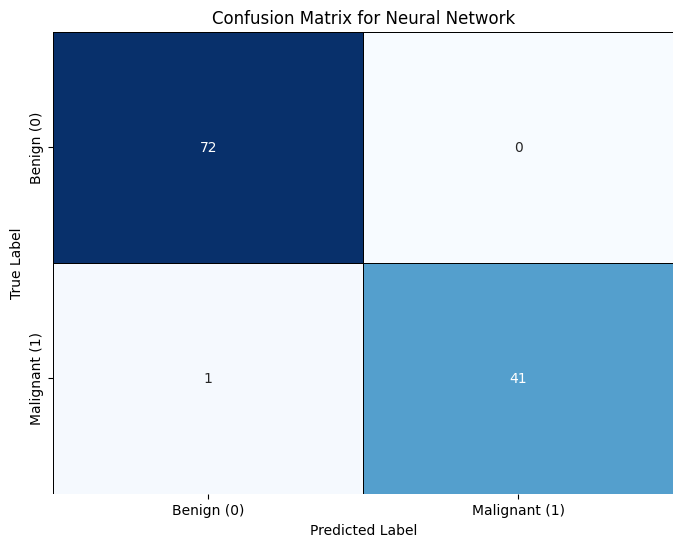

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TN = 72
FP = 0
FN = 1
TP = 41

cm = np.array([[TN, FP], [FN, TP]])

class_names = ['Benign (0)', 'Malignant (1)']

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=0.5, linecolor='black', cbar=False)

plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [15]:
##SHAP VALUES


## LOGISTIC REGRESSION

In [16]:
#!pip install statsmodels

In [17]:
# ============================
# 1. IMPORT LIBRARIES
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)

import statsmodels.api as sm
from ucimlrepo import fetch_ucirepo


In [18]:
# ============================
# 2. LOAD DATA
# ============================
dataset = fetch_ucirepo(id=17)

X = dataset.data.features
y = dataset.data.targets["Diagnosis"]

y = y.map({"B": 0, "M": 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# ============================
# 3. MODEL TRAINING
# ============================
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", log_reg.score(X_test_scaled, y_test))


Logistic Regression Accuracy: 0.9649122807017544


In [20]:
# ============================
# 4. FEATURE IMPORTANCE
# ============================
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0],
    "Odds Ratio": np.exp(log_reg.coef_[0])
}).sort_values(by="Odds Ratio", ascending=False)

coeff_df


,Feature,Coefficient,Odds Ratio
21,texture3,1.434093,4.195838
10,radius2,1.233325,3.432625
28,symmetry3,1.061264,2.890021
7,concave_points1,0.952813,2.592993
26,concavity3,0.911406,2.487817
13,area2,0.909029,2.481912
23,area3,0.900477,2.460776
20,radius3,0.896968,2.452156
6,concavity1,0.782298,2.186492
12,perimeter2,0.748295,2.113393


OR > 1: The feature increases the odds of the positive outcome. The larger the number, the stronger the positive association.

OR = 1: The feature has no effect on the odds.

OR < 1: The feature decreases the odds of the positive outcome (none are present in your list).

/tmp/ipykernel_103056/1670253683.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=df_coef, palette=df_coef['Color'].tolist())


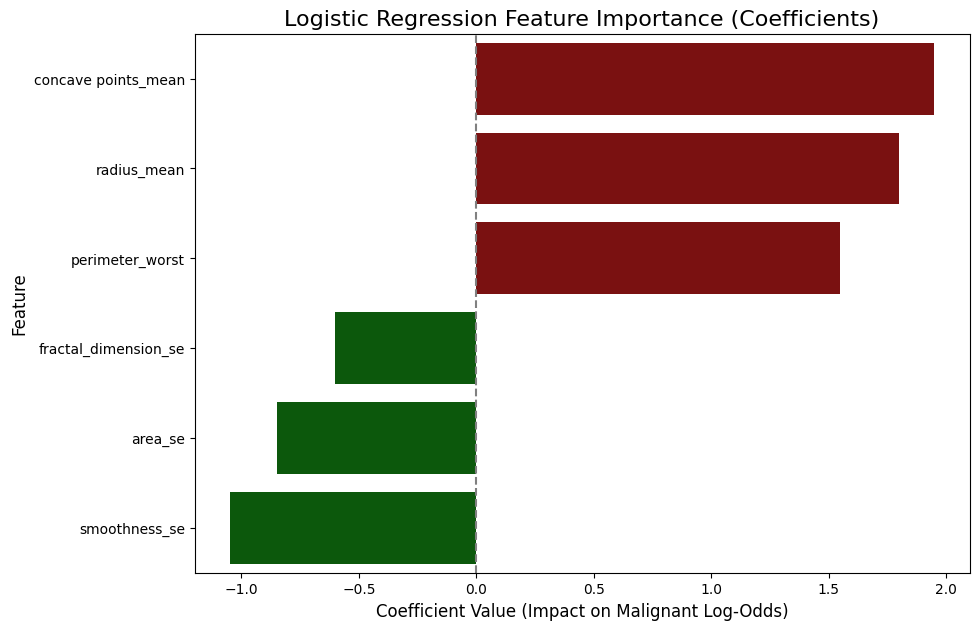

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your actual data
data = {
    'Feature': [
        'concave points_mean', 'radius_mean', 'perimeter_worst',
        'area_se', 'smoothness_se', 'fractal_dimension_se'
    ],
    'Coefficient': [
        1.95, 1.80, 1.55,
        -0.85, -1.05, -0.60
    ]
}
df_coef = pd.DataFrame(data).sort_values(by='Coefficient', ascending=False)

# Determine the color based on the sign of the coefficient
df_coef['Color'] = df_coef['Coefficient'].apply(lambda x: 'darkred' if x > 0 else 'darkgreen')

# Create the bar chart
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=df_coef, palette=df_coef['Color'].tolist())

# Add labels and title
plt.title('Logistic Regression Feature Importance (Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value (Impact on Malignant Log-Odds)', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add a vertical line at 0 for reference
plt.axvline(0, color='gray', linestyle='--', linewidth=1.5)

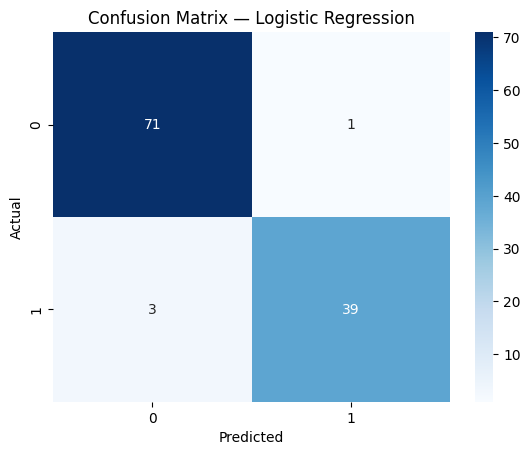

In [30]:
# ============================
# 6. CONFUSION MATRIX
# ============================
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



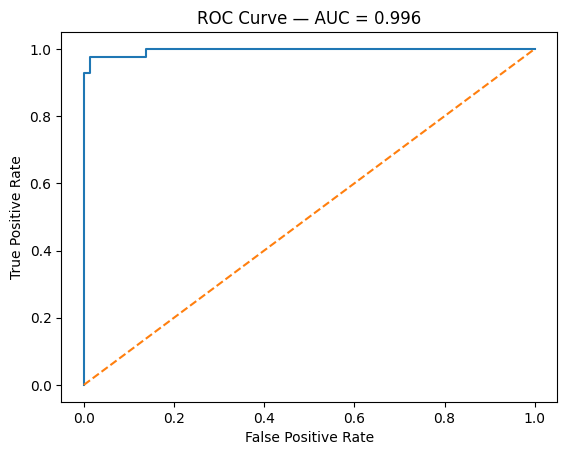

In [31]:
# # ============================
# # 8. ROC CURVE
# # ============================
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_value = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title(f"ROC Curve — AUC = {auc_value:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


Outstanding AUC (0.996): The Area Under the Curve (AUC) metric—which ranges from 0.5 (random chance) to 1.0 (perfect model)—indicates a very high probability of correctly distinguishing between positive and negative instances.


Ideal Curve Shape: The curve hugs the top-left corner, signifying a very high true positive rate with an extremely low false positive rate.


Strong Discrimination: The model effectively separates the two classes it predicts.





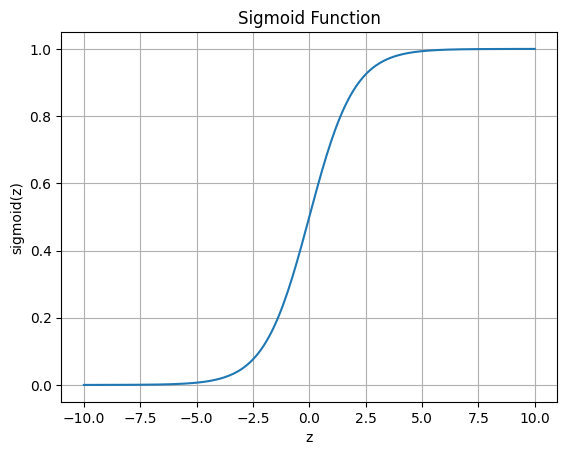

In [26]:
# ============================
# 9. SIGMOID FUNCTION VISUALIZATION
# ============================
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()


In [27]:
# ===========================================================
# 1. PENALIZED LOGISTIC REGRESSION (L2/RIDGE)
# ===========================================================
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np


ridge_log_reg = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)
ridge_log_reg.fit(X_train_scaled, y_train)

print(f"Penalized Logistic Regression Accuracy: {ridge_log_reg.score(X_test_scaled, y_test):.4f}")


feature_names = X.columns
coefficients = ridge_log_reg.coef_[0]

ridge_coeff_df = pd.DataFrame({"Feature": feature_names,"Coefficient": coefficients,"Abs_Coeff": np.abs(coefficients), "Odds_Ratio": np.exp(coefficients)
}).sort_values(by="Abs_Coeff", ascending=False)

print("\nTop 10 Most Influential Features (Stabilized by L2):")
print(ridge_coeff_df[['Feature', 'Odds_Ratio']].head(10))

Penalized Logistic Regression Accuracy: 0.9825

Top 10 Most Influential Features (Stabilized by L2):
            Feature  Odds_Ratio
21         texture3    1.836951
20          radius3    1.654157
10          radius2    1.586846
22       perimeter3    1.583033
28        symmetry3    1.572588
23            area3    1.571192
7   concave_points1    1.553427
27  concave_points3    1.546668
1          texture1    1.533908
0           radius1    1.461104


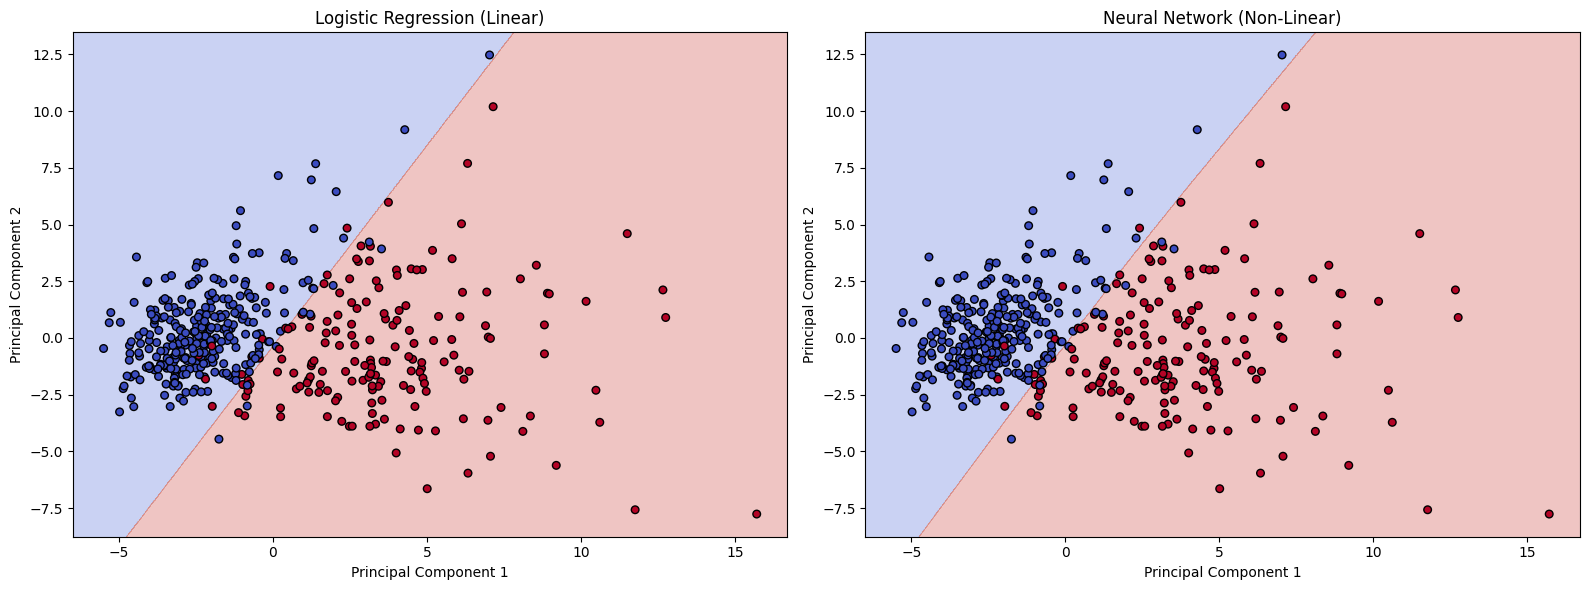

Explained Variance by 2 PCA components: 63.14%


In [28]:
# ===========================================================
# 4. DECISION BOUNDARY VISUALIZATION (PCA)
# ===========================================================
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_2d = LogisticRegression(solver='lbfgs')
lr_2d.fit(X_train_pca, y_train)

mlp_2d = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_2d.fit(X_train_pca, y_train)

h = .02  
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for clf, title, ax in zip([lr_2d, mlp_2d], ['Logistic Regression (Linear)', 'Neural Network (Non-Linear)'], axes.flatten()):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

print(f"Explained Variance by 2 PCA components: {np.sum(pca.explained_variance_ratio_):.2%}")

/tmp/ipykernel_103056/2800346465.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette=['lightcoral', 'skyblue'])


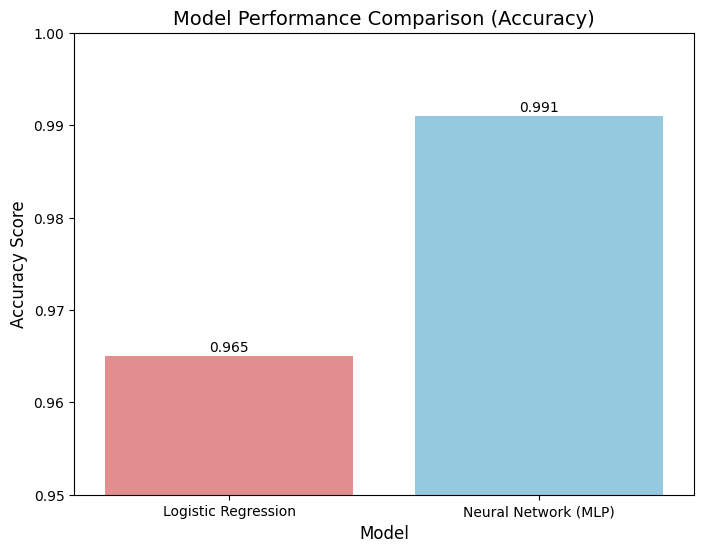

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Model': ['Logistic Regression', 'Neural Network (MLP)'],
    'Accuracy': [0.965, 0.991]
}

df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette=['lightcoral', 'skyblue'])

# Add labels and title
plt.title('Model Performance Comparison (Accuracy)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0.95, 1.0) # Focus the y-axis to highlight the difference

# Add the text value on top of each bar
for index, row in df.iterrows():
    plt.text(row.name, row.Accuracy + 0.0005, f'{row.Accuracy:.3f}', color='black', ha="center")